### SWORDv17

In [94]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import LineString, Point
from shapely.ops import split

In [2]:
data_path = '/nas/cee-water/cjgleason/data/SWORD/SWORDv17/shp/NA/'

In [15]:
node = gpd.read_file(os.path.join(data_path, 'na_sword_nodes_hb73_v17.shp'))

In [17]:
reach = gpd.read_file(os.path.join(data_path, 'na_sword_reaches_hb73_v17.shp'))

In [86]:
node_test = node[node['reach_id'] == 73111000343].geometry
reach_test = reach[reach['reach_id'] == 73111000343].geometry[0]

In [87]:
result = split(reach_test, node_test[1])

In [99]:
result.geoms

In [64]:
# Initialize an empty list to store the resulting segments
segments = []

# Iterate through the points and split the linestring
for point in node_test:
    # print(point)
    # Split the linestring at the current point
    result = split(reach_test, point)
    # print(result)

    # Check if the result is a GeometryCollection (meaning the split created multiple linestrings)
    if result.geom_type == 'GeometryCollection':
        # Iterate through the geometries in the collection and add them to the segments list
        for geom in result.geoms:
            segments.append(geom)
    else:
    # If the result is a single linestring, add it to the segments list
        segments.append(result)
    # Update the linestring for the next iteration
    reach_test = segments[-1]

In [77]:
# for i in range(len(segments)):
#     gpd.GeoSeries(segments[i]).plot()

<Axes: >

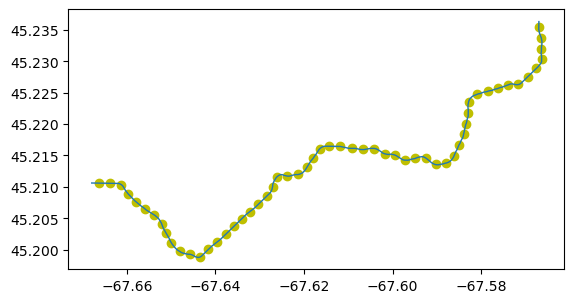

In [34]:
fig, ax = plt.subplots()

node[node['reach_id'] == 73111000343].plot(ax=ax, color='y')
reach[reach['reach_id'] == 73111000343].plot(linewidth=1, ax=ax)

In [1]:
import pandas as pd

In [2]:
cent = pd.read_parquet('/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_01_2025_03_02_min/SWOT_L2_HR_PIXC_001_242_071L_20230729T202412_20230729T202423_PGC0_01_reaches_cent.parquet')

In [3]:
cent

,Bin_Min,quantile,coverage,threshold,count
0,"(0, 10]",0.00,0.000,0.1,3110
1,"(0, 10]",0.01,0.000,0.1,3110
2,"(0, 10]",0.02,0.000,0.1,3110
3,"(0, 10]",0.03,0.000,0.1,3110
4,"(0, 10]",0.04,0.000,0.1,3110
...,...,...,...,...,...
4495,"(40, 50]",0.95,0.075,0.9,60
4496,"(40, 50]",0.96,0.080,0.9,60
4497,"(40, 50]",0.97,0.085,0.9,60
4498,"(40, 50]",0.98,0.090,0.9,60


In [4]:
reach_min = pd.read_parquet('/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC_output/PIXC_v2_0_HUC2_01_2025_03_02_min/SWOT_L2_HR_PIXC_001_242_071L_20230729T202412_20230729T202423_PGC0_01_reaches_min.parquet')

In [5]:
reach_min

,NHDPlusID,coverage,Bin_Min
0,5.000100e+12,0.0,"(0, 10]"
1,5.000100e+12,0.0,"(0, 10]"
2,5.000100e+12,0.0,"(0, 10]"
3,5.000100e+12,0.0,"(0, 10]"
4,5.000100e+12,0.0,"(0, 10]"
...,...,...,...
4265,5.000100e+12,0.0,"(0, 10]"
4266,5.000100e+12,0.0,"(0, 10]"
4267,5.000100e+12,0.0,"(0, 10]"
4268,5.000100e+12,0.0,"(0, 10]"


In [2]:
import json

In [4]:
def open_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
        return data

In [5]:
file_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC/data/PIXC_v2_0_HUC2_01_filtered.json'
data = open_json(file_path)

In [16]:
for i in range(len(data)):
    if '_03.nc' in data[i]:
        print(data[i])

SWOT_L2_HR_PIXC_008_520_072R_20240101T200214_20240101T200225_PGC0_03.nc
SWOT_L2_HR_PIXC_018_270_075L_20240719T131144_20240719T131156_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_075R_20240719T131144_20240719T131156_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_076L_20240719T131154_20240719T131206_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_076R_20240719T131154_20240719T131206_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_077L_20240719T131204_20240719T131216_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_077R_20240719T131204_20240719T131216_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_078L_20240719T131214_20240719T131226_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_078R_20240719T131214_20240719T131226_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_079L_20240719T131224_20240719T131228_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_079R_20240719T131224_20240719T131228_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_081L_20240719T131245_20240719T131254_PIC0_03.nc
SWOT_L2_HR_PIXC_018_270_081R_20240719T131245_20240719T131254_PIC0_03.nc
SWOT_L2_HR_PIXC_018_298_077L_20240720T131236_20240720T131247_PIC

In [1]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2025-02-25


In [31]:
import os

import earthaccess
import geopandas as gpd
import numpy as np
import pandas as pd
import xarray as xr

### Set-up

In [2]:
mdata_path = '/nas/cee-water/cjgleason/fiona/narrow_rivers_PIXC/data/'

In [3]:
dtype_dic = {'tile': str, 'huc4': str, 'coverage': float}

In [4]:
lookup = pd.read_csv(os.path.join(mdata_path,
                                  'huc4_swot_science_tiles.csv'),
                     dtype=dtype_dic)

### Get the right tiles

In [5]:
# Get tiles in HUC2_01
huc2_01 = lookup[lookup['huc4'].str.startswith('01')]

In [16]:
huc2_01[huc2_01['tile'] == '313_235R']

,tile,huc4,coverage
6028,313_235R,0102,9.999995e-01
6029,313_235R,0103,4.838475e-07


In [14]:
huc2_01[]

,tile,huc4,coverage
0,007_232L,0105,0.945353
1,007_232R,0105,0.177610
2,007_233L,0102,0.592054
3,007_233L,0103,0.006881
4,007_233L,0105,0.401065
...,...,...,...
11289,576_081R,0109,0.259181
11290,576_081R,0110,0.740819
11291,576_082L,0109,0.486447
11292,576_082R,0109,0.197650


In [13]:
huc2_01.index.get_loc(5788)

171

In [6]:
# Get list of tiles
tiles = list(huc2_01['tile'])

In [7]:
tiles = [tile + '_*' for tile in tiles]
tiles = ['*_' + tile for tile in tiles]

In [18]:
len(list(set(tiles)))

190

In [ ]:
tiles

### Test tile

In [5]:
# Set PIXC filepath
data_path = '/nas/cee-water/cjgleason/fiona/data/PIXC_v2_0_HUC2_01_new'
file_name = 'SWOT_L2_HR_PIXC_001_242_070L_20230729T202402_20230729T202413_PGC0_01.nc'
pixc_path = os.path.join(data_path, file_name)

In [6]:
# Read in pixel group
ds_PIXC = xr.open_mfdataset(paths=pixc_path, group = 'pixel_cloud', engine='h5netcdf')

In [7]:
ds_PIXC

<xarray.Dataset> Size: 2GB
Dimensions:                                (points: 7628769, complex_depth: 2,
                                            num_pixc_lines: 3264)
Coordinates:
    latitude                               (points) float64 61MB dask.array<chunksize=(508585,), meta=np.ndarray>
    longitude                              (points) float64 61MB dask.array<chunksize=(508585,), meta=np.ndarray>
Dimensions without coordinates: points, complex_depth, num_pixc_lines
Data variables: (12/61)
    azimuth_index                          (points) float64 61MB dask.array<chunksize=(953597,), meta=np.ndarray>
    range_index                            (points) float64 61MB dask.array<chunksize=(953597,), meta=np.ndarray>
    interferogram                          (points, complex_depth) float32 61MB dask.array<chunksize=(1907193, 1), meta=np.ndarray>
    power_plus_y                           (points) float32 31MB dask.array<chunksize=(953597,), meta=np.ndarray>
    power_minus_y                          (points) float32 31MB dask.array<chunksize=(953597,), meta=np.ndarray>
    coherent_power                         (points) float32 31MB dask.array<chunksize=(953597,), meta=np.ndarray>
    ...                                     ...
    pixc_line_qual                         (num_pixc_lines) float64 26kB dask.array<chunksize=(3264,), meta=np.ndarray>
    pixc_line_to_tvp                       (num_pixc_lines) float32 13kB dask.array<chunksize=(3264,), meta=np.ndarray>
    data_window_first_valid                (num_pixc_lines) float64 26kB dask.array<chunksize=(3264,), meta=np.ndarray>
    data_window_last_valid                 (num_pixc_lines) float64 26kB dask.array<chunksize=(3264,), meta=np.ndarray>
    data_window_first_cross_track          (num_pixc_lines) float32 13kB dask.array<chunksize=(3264,), meta=np.ndarray>
    data_window_last_cross_track           (num_pixc_lines) float32 13kB dask.array<chunksize=(3264,), meta=np.ndarray>
Attributes:
    description:                 cloud of geolocated interferogram pixels
    interferogram_size_azimuth:  3264
    interferogram_size_range:    4952
    looks_to_efflooks:           1.5438651705105269
    num_azimuth_looks:           7.0
    azimuth_offset:              6

### Test HUC

In [14]:
data_path = '/nas/cee-water/cjgleason/craig/CONUS_ephemeral_data/HUC2_01/NHDPLUS_H_0108_HU4_GDB/NHDPLUS_H_0108_HU4_GDB.gdb'

In [18]:
flowlines = gpd.read_file(filename=data_path, layer='NHDFlowline')

/work/pi_cjgleason_umass_edu/.conda/envs/narrowPIXC/lib/python3.12/site-packages/pyogrio/raw.py:196: UserWarning: Measured (M) geometry types are not supported. Original type 'Measured 3D MultiLineString' is converted to 'MultiLineString Z'
  return ogr_read(


In [19]:
flowlines.columns

Index(['Permanent_Identifier', 'FDate', 'Resolution', 'GNIS_ID', 'GNIS_Name',
       'LengthKM', 'ReachCode', 'FlowDir', 'WBArea_Permanent_Identifier',
       'FType', 'FCode', 'MainPath', 'InNetwork', 'VisibilityFilter',
       'Shape_Length', 'NHDPlusID', 'VPUID', 'Enabled', 'geometry'],
      dtype='object')

In [20]:
vaa = gpd.read_file(filename=data_path, layer='NHDPlusFlowlineVAA')

In [21]:
vaa.columns

Index(['NHDPlusID', 'StreamLeve', 'StreamOrde', 'StreamCalc', 'FromNode',
       'ToNode', 'HydroSeq', 'LevelPathI', 'PathLength', 'TerminalPa',
       'ArbolateSu', 'Divergence', 'StartFlag', 'TerminalFl', 'UpLevelPat',
       'UpHydroSeq', 'DnLevel', 'DnLevelPat', 'DnHydroSeq', 'DnMinorHyd',
       'DnDrainCou', 'FromMeas', 'ToMeas', 'ReachCode', 'RtnDiv', 'Thinner',
       'VPUIn', 'VPUOut', 'AreaSqKm', 'TotDASqKm', 'DivDASqKm', 'MaxElevRaw',
       'MinElevRaw', 'MaxElevSmo', 'MinElevSmo', 'Slope', 'SlopeLenKm',
       'ElevFixed', 'HWType', 'HWNodeSqKm', 'StatusFlag', 'VPUID'],
      dtype='object')

In [43]:
vaa[vaa['Slope'] != -9998]['Slope']

0        0.008986
1        0.000010
2        0.007037
3        0.028154
4        0.003000
           ...   
98249    0.017187
98250    0.000010
98251    0.037926
98252    0.130500
98253    0.017397
Name: Slope, Length: 97866, dtype: float64

In [22]:
eromma = gpd.read_file(filename=data_path, layer='NHDPlusEROMMA')

In [23]:
eromma.columns

Index(['NHDPlusID', 'QAMA', 'VAMA', 'QIncrAMA', 'QBMA', 'VBMA', 'QIncrBMA',
       'QCMA', 'VCMA', 'QIncrCMA', 'QDMA', 'VDMA', 'QIncrDMA', 'QEMA', 'VEMA',
       'QIncrEMA', 'QFMA', 'QIncrFMA', 'ArQNavMA', 'PETMA', 'QLossMA',
       'QGAdjMA', 'QGNavMA', 'GageAdjMA', 'AvgQAdjMA', 'GageIDMA', 'GageQMA',
       'VPUID'],
      dtype='object')